# Directory

In [1]:
import os

if os.getcwd() == "/home/dquintani/boligrafica/covid":
    directory = '/home/dquintani/boligrafica/covid/'
else:
    directory = ""
    
print(directory)

# Dependencias!
if adding new dependency, and notebook is linked to a github workflow, you must make sure all dependencies are also on the requirements.txt too! If not, github workflow will fail and you wiill be very, very sad.

In [2]:
#!pip install matplotlib==3.3.4
#!pip freeze 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import datetime 
from datetime import date


#dates
import matplotlib.dates as mdates

#mtick for percentages in axes
import matplotlib.ticker as mtick

#colormaps
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

# other important requirements/definitions

In [3]:
plt.style.use("Solarize_Light2")

In [4]:
ordenado = ['Bolivia', 'La Paz','Cochabamba','Santa Cruz', 'Oruro', 'Potosí', 'Chuquisaca','Tarija','Beni','Pando']

In [5]:
habitantes = pd.read_csv("https://raw.githubusercontent.com/dquintani/covid/main/habitantes.csv",index_col = 0)
habitantes = habitantes[['Bolivia', 'La Paz','Cochabamba','Santa Cruz', 'Oruro', 'Potosí', 'Chuquisaca','Tarija','Beni','Pando']]

habitantes.to_csv(directory + "habitantes.csv")
habitantes

Bolivia   La Paz  Cochabamba  Santa Cruz   Oruro  Potosí  Chuquisaca  \
NaN  11620000  2927000     2029000     3370000  538000  902000      637000   

     Tarija    Beni   Pando  
NaN  583000  480000  154000

# CASOS

Casos diarios y acumulados

In [6]:
casos_diarios = pd.read_csv("https://github.com/mauforonda/covid19-bolivia-udape/raw/master/confirmados_diarios.csv",
                    index_col = 0)
casos_diarios["Bolivia"] = casos_diarios.sum(axis=1)
casos_diarios = casos_diarios[['Bolivia', 'La Paz','Cochabamba','Santa Cruz', 'Oruro', 'Potosí', 'Chuquisaca','Tarija','Beni','Pando']]
casos_diarios.to_csv(directory + "casos_diarios.csv")
casos_diarios.index = pd.to_datetime(casos_diarios.index)
casos_diarios

Bolivia  La Paz  Cochabamba  Santa Cruz  Oruro  Potosí  \
2020-03-10        0       0           0           0      0       0   
2020-03-11        1       0           0           1      0       0   
2020-03-12        0       0           0           0      0       0   
2020-03-13        7       0           1           0      6       0   
2020-03-14        0       0           0           0      0       0   
...             ...     ...         ...         ...    ...     ...   
2021-10-09      303      67          32         122      9      15   
2021-10-10      187      50          12          86     13       3   
2021-10-11      199       9          53          69      0      13   
2021-10-12      480      81          88         227      6      13   
2021-10-13      556      73         115         248     10      16   

            Chuquisaca  Tarija  Beni  Pando  
2020-03-10           0       0     0      0  
2020-03-11           0       0     0      0  
2020-03-12           0       0     0      0  
2020-03-13           0       0     0      0  
2020-03-14           0       0     0      0  
...                ...     ...   ...    ...  
2021-10-09          45      11     2      0  
2021-10-10          20       3     0      0  
2021-10-11          36      19     0      0  
2021-10-12          36      28     0      1  
2021-10-13          68      23     3      0  

[583 rows x 10 columns]

In [7]:
#promedio movil casos
casos_diarios7 = casos_diarios.rolling(7).mean()
casos_diarios7 = casos_diarios7.round(decimals=0)

#casos_diarios7

In [8]:
casos_acumulados = casos_diarios.cumsum(axis = 0)
casos_acumulados.to_csv(directory + "casos_acumulados.csv")

casos_acumulados

Bolivia  La Paz  Cochabamba  Santa Cruz  Oruro  Potosí  \
2020-03-10        0       0           0           0      0       0   
2020-03-11        1       0           0           1      0       0   
2020-03-12        1       0           0           1      0       0   
2020-03-13        8       0           1           1      6       0   
2020-03-14        8       0           1           1      6       0   
...             ...     ...         ...         ...    ...     ...   
2021-10-09   503642  103194       75890      175451  24557   24068   
2021-10-10   503829  103244       75902      175537  24570   24071   
2021-10-11   504028  103253       75955      175606  24570   24084   
2021-10-12   504508  103334       76043      175833  24576   24097   
2021-10-13   505064  103407       76158      176081  24586   24113   

            Chuquisaca  Tarija   Beni  Pando  
2020-03-10           0       0      0      0  
2020-03-11           0       0      0      0  
2020-03-12           0       0      0      0  
2020-03-13           0       0      0      0  
2020-03-14           0       0      0      0  
...                ...     ...    ...    ...  
2021-10-09       33553   39464  20575   6890  
2021-10-10       33573   39467  20575   6890  
2021-10-11       33609   39486  20575   6890  
2021-10-12       33645   39514  20575   6891  
2021-10-13       33713   39537  20578   6891  

[583 rows x 10 columns]

In [9]:
fig, axs = plt.subplots(5,2, figsize = (16,20), dpi=140
                        )
axs = axs.flatten()

#background_color1 = "#d0d0d0"
#background_color2 = "w"
#fig.set_facecolor(background_color1)

fig.suptitle("Casos confirmados de COVID-19:\nBolivia y los 9 departamentos", fontsize= 26, y=1.045)
fig.text(.5, .98, "última actualización: {}".format(casos_diarios.index[-1].date()), ha="center", fontsize=14)
fig.text(0.5,-.03 ,"Datos de Mauricio Foronda (@mauforonda) vía UDAPE, actualización diaria", ha="center", fontsize=18)

start_day = 400

for i in range(10):
  axs[i].grid(zorder=3)
  axs[i].bar(casos_diarios.index[start_day:], casos_diarios[casos_diarios.columns[i]][start_day:], 
             color = "#ffbf00", 
             label="Casos confirmados de COVID-19\nÚltima actualización ({}): {}".format(casos_diarios.index[-1].date(),casos_diarios.iloc[-1,i].astype(int)),
             width = .75, 
             zorder=2)
  axs[i].set_title(casos_diarios.columns[i], fontsize = 22)
  axs[i].plot(casos_diarios.index[start_day:], casos_diarios7[casos_diarios7.columns[i]][start_day:], color = "r", label="Promedio móvil semanal",zorder=3, linewidth=4)
  #axs[i].set_facecolor(background_color2)
  #axs[i].set_ylim(0,casos_diarios7[casos_diarios7.columns[i]].max()*1.20)
  #axs[i].set_xlim(casos_diarios.index[30], casos_diarios.index[-1] + datetime.timedelta(days=10))
  axs[i].xaxis.set_major_formatter(mdates.DateFormatter("%b-%y"))

  
  axs[i].annotate( "Promedio\núltimo:\n" + str(casos_diarios7.iloc[-1,i].astype(int)),
      xy = (casos_diarios7.index[-1] + datetime.timedelta(days=3), casos_diarios7.iloc[-1,i]),
      fontsize=8,
      color = "black",
      bbox={
              'edgecolor': 'r',
              'facecolor': 'w', 
              'alpha': .9}
          )
  #if casos_diarios.iloc[:,i]==0:
  no_cases_df= casos_diarios[casos_diarios.iloc[:,i]==0].iloc[:,i]
  for k in range(len(no_cases_df)):
                 axs[i].annotate(s=".",
                     xy=(no_cases_df.index[k], no_cases_df[k]),
                     fontsize=30,
                     color="g",
                     label="0 casos en este día"
                                )
  axs[i].legend(loc="upper left")

fig.tight_layout(pad=0.5, w_pad=0.8, h_pad=2.5)

/tmp/ipykernel_1645/4002442171.py:42: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axs[i].annotate(s=".",
/tmp/ipykernel_1645/4002442171.py:42: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axs[i].annotate(s=".",
/tmp/ipykernel_1645/4002442171.py:42: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axs[i].annotate(s=".",
/tmp/ipykernel_1645/4002442171.py:42: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axs[i].annotate(s=".",
/tmp/ipykernel_1645/4002442171.py:42: Matplotlib

In [10]:
fig.savefig(directory + "graficas/casos_todos.jpg", bbox_inches="tight")

In [11]:
fig, axs = plt.subplots(5,2, figsize = (16,20), 
                        dpi=100,
                        sharey=False
                        )
axs = axs.flatten()

# background_color1 = "#d0d0d0"
# background_color2 = "w"
#fig.set_facecolor(background_color1)


fig.suptitle("Casos confirmados de COVID-19 (acumulados):\nBolivia y los 9 departamentos", fontsize= 26, y=1.045)
fig.text(.5, .98, "última actualización: {}".format(casos_acumulados.index[-1].date()), ha="center", fontsize=14)
fig.text(0.5,-.03 ,"Datos de Mauricio Foronda (@mauforonda) vía UDAPE, actualización diaria", ha="center", fontsize=18)


for i in range(10):
  axs[i].grid(zorder=3)
  axs[i].bar(casos_acumulados.index, casos_acumulados[casos_acumulados.columns[i]], 
             color = cm.get_cmap("viridis",10)(range(10))[i], 
             label="Casos confirmados acumulados de COVID-19\nÚltima actualización ({}): {}".format(casos_acumulados.index[-1].date(),casos_acumulados.iloc[-1,i].astype(int)),
             width = .75, 
             zorder=2)
  axs[i].set_title(casos_acumulados.columns[i], fontsize = 22)
  #axs[i].plot(casos_diarios.index, casos_diarios7[casos_diarios7.columns[i]], color = "r", label="Promedio móvil semanal",zorder=3, linewidth=4)
  #axs[i].set_facecolor(background_color2)
  axs[i].set_ylim(0,casos_acumulados[casos_acumulados.columns[i]].max()*1.20)
  axs[i].set_xlim(casos_acumulados.index[30], casos_acumulados.index[-1] + datetime.timedelta(days=10))
  axs[i].legend(loc="upper left", fontsize=14)
  axs[i].xaxis.set_major_formatter(mdates.DateFormatter("%b-%y"))

  
  axs[i].annotate( "último:\n" + str(casos_acumulados.iloc[-1,i].astype(int)),
      xy = (casos_acumulados.index[-1] - datetime.timedelta(days=80), casos_acumulados.iloc[-1,i]/2),
      fontsize=14,
      color = cm.get_cmap("viridis",10)(range(10))[i],
      bbox={
              'edgecolor': 'w',
              'facecolor': 'w', 
              'alpha': .8}
          )


fig.tight_layout(pad=0.5, w_pad=0.8, h_pad=2.5)


In [12]:
fig.savefig(directory + "graficas/casos_todos_acum.jpg", bbox_inches="tight")

# Muertes

Muertes diarias y acumuladas

In [13]:
muertes_diarias = pd.read_csv("https://github.com/mauforonda/covid19-bolivia-udape/raw/master/decesos_diarios.csv",
                    index_col = 0)
muertes_diarias["Bolivia"] = muertes_diarias.sum(axis=1)
muertes_diarias = muertes_diarias[['Bolivia', 'La Paz','Cochabamba','Santa Cruz', 'Oruro', 'Potosí', 'Chuquisaca','Tarija','Beni','Pando']]

muertes_diarias.to_csv(directory + "muertes_diarias.csv")
muertes_diarias.index = pd.to_datetime(muertes_diarias.index)

muertes_diarias

Bolivia  La Paz  Cochabamba  Santa Cruz  Oruro  Potosí  \
2020-03-10        0       0           0           0      0       0   
2020-03-11        0       0           0           0      0       0   
2020-03-12        0       0           0           0      0       0   
2020-03-13        0       0           0           0      0       0   
2020-03-14        0       0           0           0      0       0   
...             ...     ...         ...         ...    ...     ...   
2021-10-09        6       2           0           2      2       0   
2021-10-10        3       2           0           0      0       0   
2021-10-11        5       0           0           2      2       0   
2021-10-12        3       2           0           0      0       1   
2021-10-13        5       2           2           0      0       0   

            Chuquisaca  Tarija  Beni  Pando  
2020-03-10           0       0     0      0  
2020-03-11           0       0     0      0  
2020-03-12           0       0     0      0  
2020-03-13           0       0     0      0  
2020-03-14           0       0     0      0  
...                ...     ...   ...    ...  
2021-10-09           0       0     0      0  
2021-10-10           1       0     0      0  
2021-10-11           0       1     0      0  
2021-10-12           0       0     0      0  
2021-10-13           0       1     0      0  

[583 rows x 10 columns]

In [14]:
muertes_diarias7 = muertes_diarias.rolling(7).mean()
muertes_diarias7 = muertes_diarias7.round(decimals=1)
muertes_diarias7.tail()

Bolivia  La Paz  Cochabamba  Santa Cruz  Oruro  Potosí  \
2021-10-09      4.7     0.9         0.3         1.6    1.0     0.0   
2021-10-10      4.9     1.0         0.3         1.6    1.0     0.0   
2021-10-11      5.3     1.0         0.3         1.9    1.0     0.0   
2021-10-12      5.1     1.3         0.3         1.4    1.0     0.1   
2021-10-13      5.1     1.4         0.6         0.9    1.0     0.1   

            Chuquisaca  Tarija  Beni  Pando  
2021-10-09         0.3     0.7   0.0    0.0  
2021-10-10         0.3     0.7   0.0    0.0  
2021-10-11         0.3     0.9   0.0    0.0  
2021-10-12         0.3     0.7   0.0    0.0  
2021-10-13         0.3     0.9   0.0    0.0

In [15]:
muertes_acumuladas = muertes_diarias.cumsum(axis = 0)
muertes_acumuladas.to_csv(directory + "muertes_acumuladas.csv")

muertes_acumuladas

Bolivia  La Paz  Cochabamba  Santa Cruz  Oruro  Potosí  \
2020-03-10        0       0           0           0      0       0   
2020-03-11        0       0           0           0      0       0   
2020-03-12        0       0           0           0      0       0   
2020-03-13        0       0           0           0      0       0   
2020-03-14        0       0           0           0      0       0   
...             ...     ...         ...         ...    ...     ...   
2021-10-09    17110    2633        2766        5912   1307     851   
2021-10-10    17113    2635        2766        5912   1307     851   
2021-10-11    17118    2635        2766        5914   1309     851   
2021-10-12    17121    2637        2766        5914   1309     852   
2021-10-13    17126    2639        2768        5914   1309     852   

            Chuquisaca  Tarija  Beni  Pando  
2020-03-10           0       0     0      0  
2020-03-11           0       0     0      0  
2020-03-12           0       0     0      0  
2020-03-13           0       0     0      0  
2020-03-14           0       0     0      0  
...                ...     ...   ...    ...  
2021-10-09        1386    1035   896    324  
2021-10-10        1387    1035   896    324  
2021-10-11        1387    1036   896    324  
2021-10-12        1387    1036   896    324  
2021-10-13        1387    1037   896    324  

[583 rows x 10 columns]

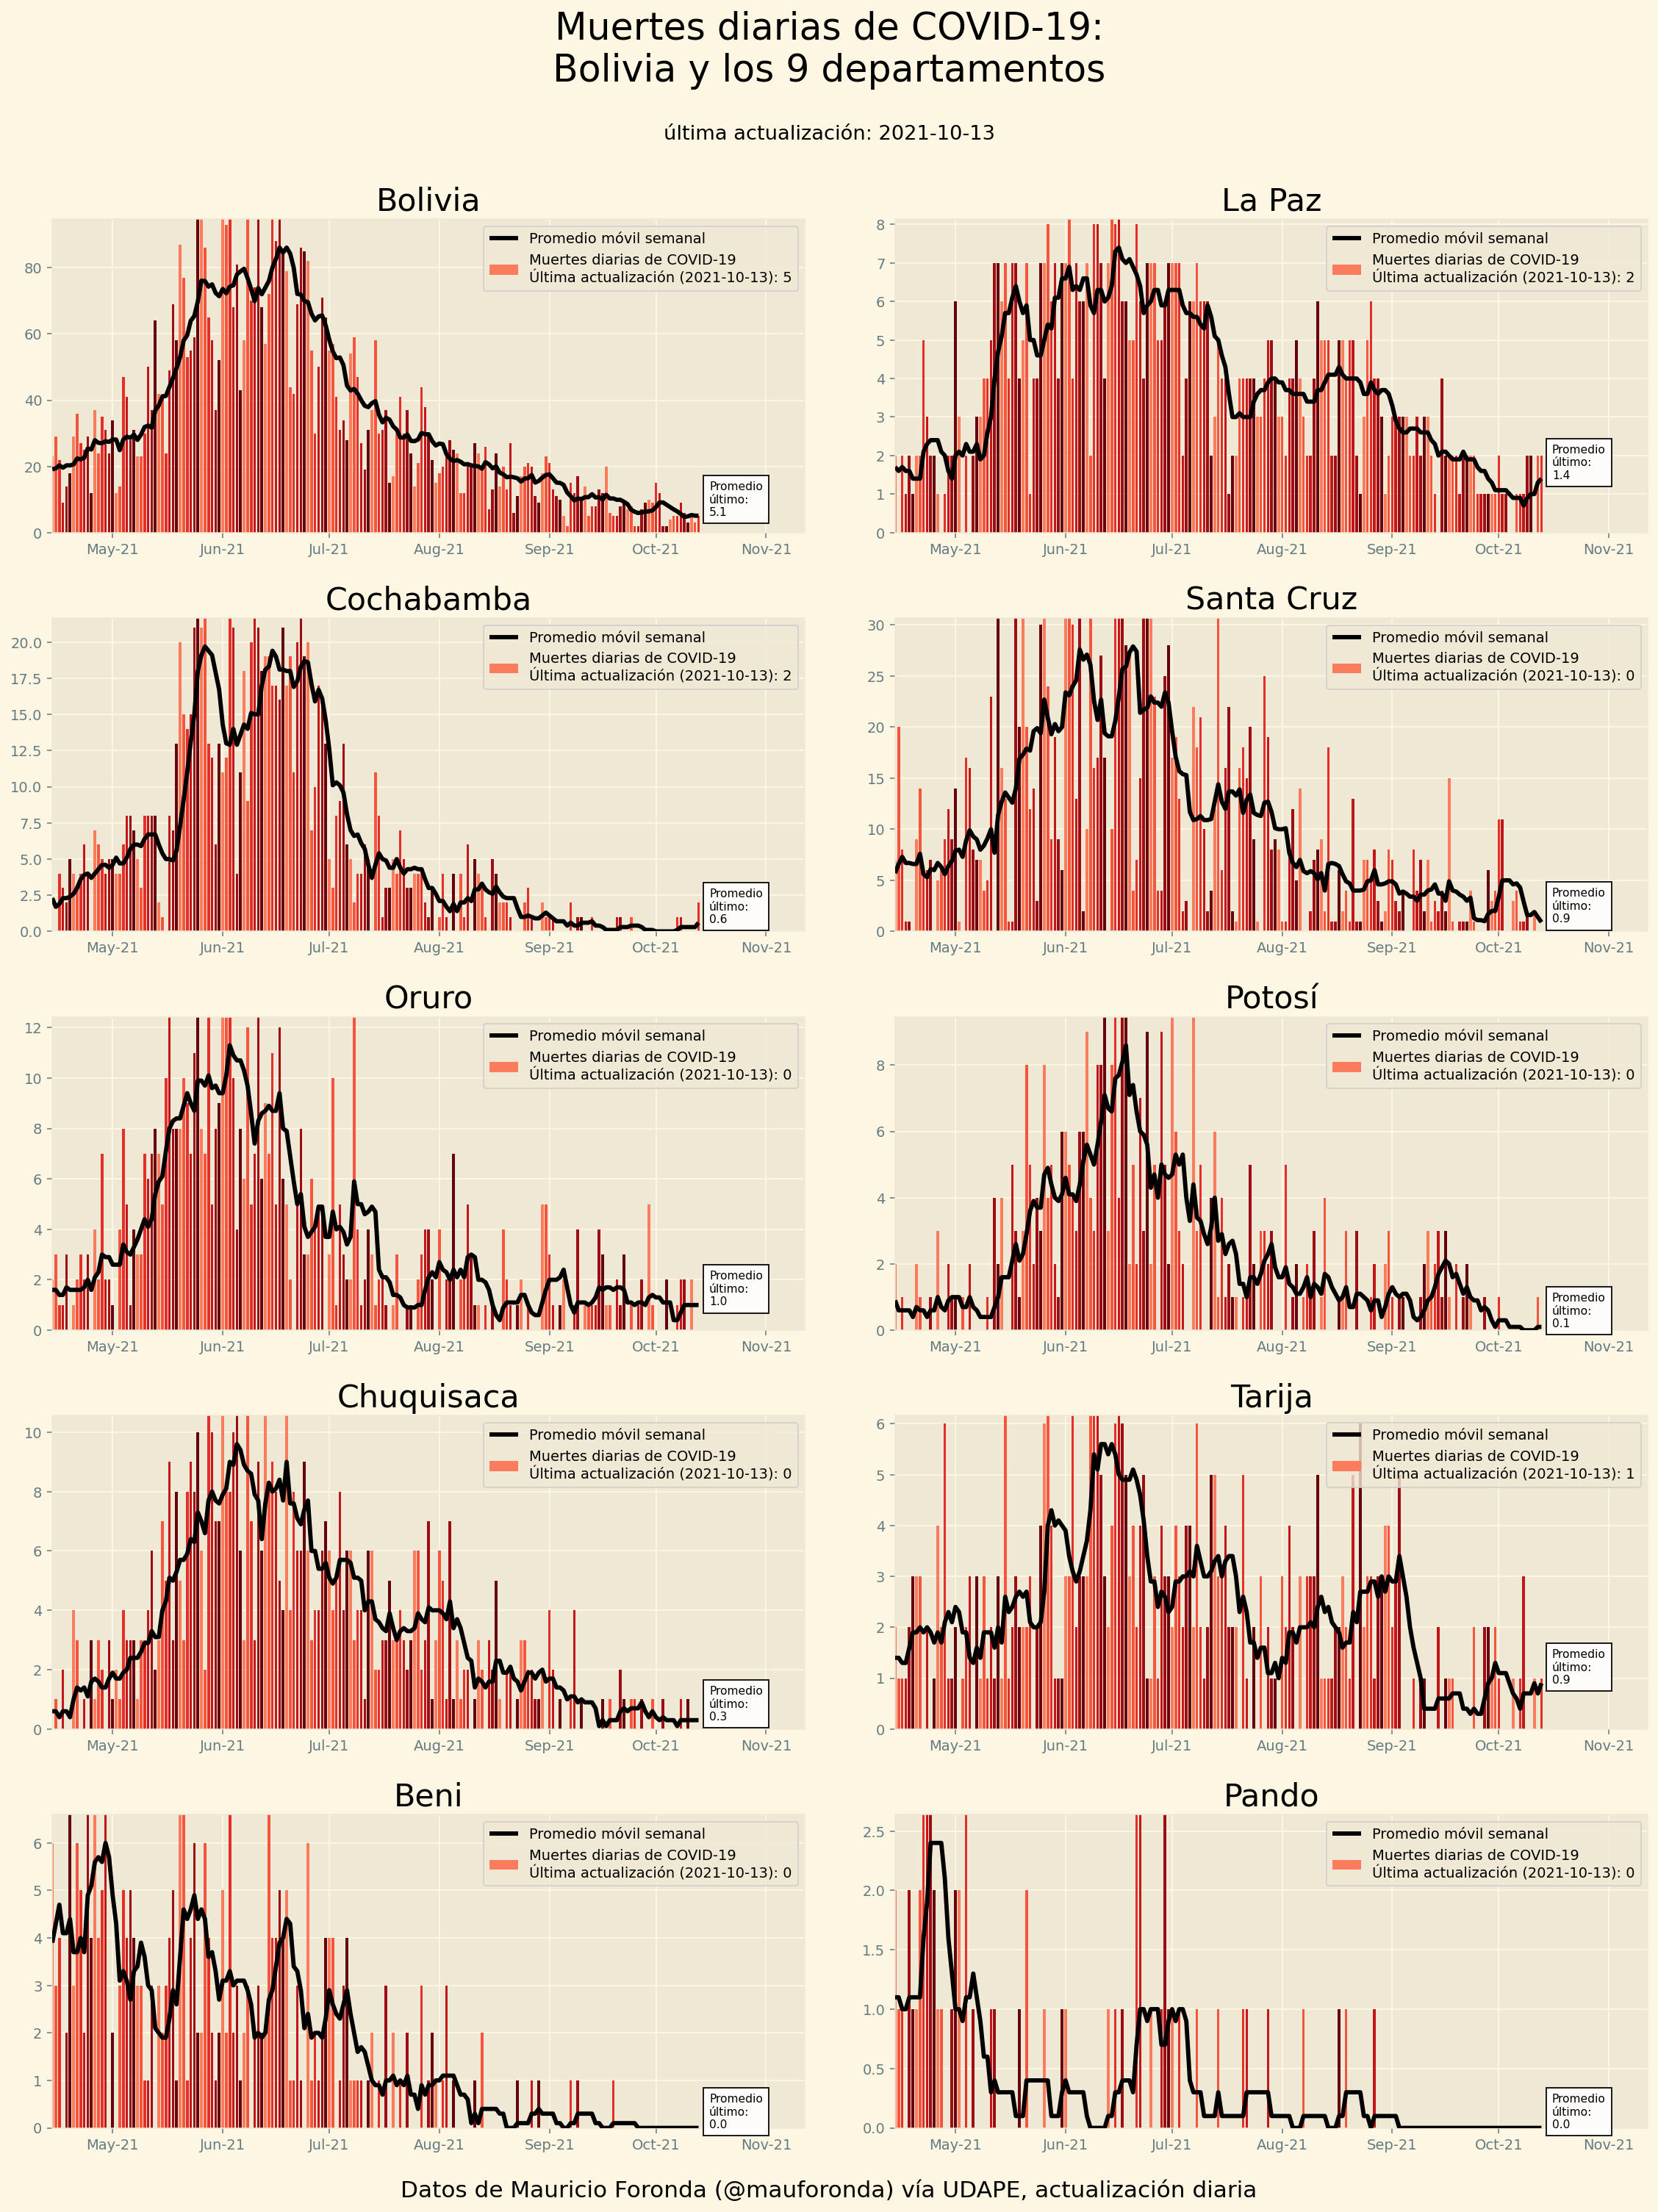

In [16]:
fig, axs = plt.subplots(5,2, figsize = (16,20), dpi=140)

axs = axs.flatten()

start_day = 400


fig.suptitle("Muertes diarias de COVID-19:\nBolivia y los 9 departamentos", fontsize= 26, y=1.043)
fig.text(0.5, .98,"última actualización: {}".format(muertes_diarias.index[-1].date()), ha="center", fontsize=14)
fig.text(0.5,-.02,"Datos de Mauricio Foronda (@mauforonda) vía UDAPE, actualización diaria", ha="center", fontsize=16)

for i in range(10):
  axs[i].grid(zorder=3)
  axs[i].bar(muertes_diarias.index[start_day:], muertes_diarias[muertes_diarias.columns[i]][start_day:], #color = "r", 
             label="Muertes diarias de COVID-19\nÚltima actualización ({}): {}".format(muertes_diarias.index[-1].date(),muertes_diarias.iloc[-1,i].astype(int)),
             width=.75 ,zorder=2,
             color=plt.get_cmap("Reds", 10)(range(4,10)))
  axs[i].set_title(muertes_diarias.columns[i], fontsize=22)
  axs[i].plot(muertes_diarias.index[start_day:], muertes_diarias7[muertes_diarias7.columns[i]][start_day:], color = "black", label="Promedio móvil semanal", zorder=3, linewidth=3)
  # axs[i].set_facecolor(background_color2)
  axs[i].set_ylim(0,muertes_diarias7[muertes_diarias7.columns[i]][start_day:].max()*1.1)
  axs[i].set_xlim(muertes_diarias.index[start_day], muertes_diarias.index[-1] + datetime.timedelta(days=30))
  axs[i].legend()
  axs[i].xaxis.set_major_formatter(mdates.DateFormatter("%b-%y"))

  
  axs[i].annotate( "Promedio\núltimo:\n" + str(muertes_diarias7.iloc[-1,i]),
      xy = (muertes_diarias7.index[-1] + datetime.timedelta(days=3), muertes_diarias7.iloc[-1,i]),
      fontsize=8,
      color = "black",
      bbox={
              'edgecolor': 'black',
              'facecolor': 'w', 
              'alpha': .9}
          )

fig.tight_layout(pad=0.3, w_pad=4, h_pad=2)

In [17]:
muertes_fig = fig.savefig(directory + "graficas/muertes_todos.jpg", bbox_inches="tight")

# Pruebas
Pruebas acumuladas = (casos acumulados)+(descartados acumulados)

In [18]:
pruebas_edu = pd.read_csv("https://raw.githubusercontent.com/pr0nstar/covid19-data/master/processed/bolivia/testing.csv",
                    index_col = 0)
pruebas_edu = pruebas_edu[pruebas_edu.columns].apply(pd.to_numeric, errors = "coerce")
pruebas_edu.index = pd.to_datetime(pruebas_edu.index)

#pruebas_edu

In [19]:
col_names = ['La Paz', 'Cochabamba', 'Santa Cruz','Oruro','Potosí','Tarija','Chuquisaca', 'Beni','Pando']

In [20]:
descartados = pruebas_edu.iloc[1:,[1,3,5,7,9,11,13,15,17]]
for i in range(9):
    descartados.rename(columns={descartados.columns[i] : col_names[i]}, inplace=True)
descartados["Bolivia"] = descartados.sum(axis=1, min_count=9)

descartados.to_csv(directory + "descartados_acumulados.csv")

#descartados

In [21]:
sospechosos = pruebas_edu.iloc[1:,[0,2,4,6,8,10,12,14,16]]
#for i in range(9):
#    sospechosos.rename(columns={sospechosos.columns[i] : col_names[i]}, inplace=True)
sospechosos["Bolivia"] = sospechosos.sum(axis=1)
#sospechosos

In [22]:
pruebas_acum = casos_acumulados + descartados
pruebas_acum = pruebas_acum.drop(pruebas_acum.index[0:58], axis=0).interpolate()
pruebas_acum = pruebas_acum[['Bolivia', 'La Paz','Cochabamba','Santa Cruz', 'Oruro', 'Potosí', 'Chuquisaca','Tarija','Beni','Pando']]


pruebas_acum.to_csv(directory + "pruebas_acum.csv")

pruebas_acum.tail()

Bolivia    La Paz  Cochabamba     Santa Cruz     Oruro  \
2021-10-10  2.497260e+06  519992.0    451515.0  967792.666667  101215.0   
2021-10-11  2.500545e+06  520180.0    452781.0  968770.000000  101310.0   
2021-10-12  2.506853e+06  521469.0    453986.0  971518.000000  101541.0   
2021-10-13  2.513691e+06  523061.0    455432.0  974117.000000  101802.0   
2021-10-14  2.513691e+06  523061.0    455432.0  974117.000000  101802.0   

             Potosí  Chuquisaca    Tarija     Beni    Pando  
2021-10-10  85679.0    126861.0  137205.0  79423.0  27653.0  
2021-10-11  85795.0    127146.0  137380.0  79525.0  27658.0  
2021-10-12  85891.0    127432.0  137700.0  79604.0  27712.0  
2021-10-13  86018.0    127946.0  137903.0  79670.0  27742.0  
2021-10-14  86018.0    127946.0  137903.0  79670.0  27742.0

In [23]:
pruebas_diarias_NaN = pruebas_acum.diff()

#getting rid of negatives
pruebas_diarias = pruebas_diarias_NaN[pruebas_diarias_NaN > 0 ]
pruebas_diarias.to_csv(directory + "pruebas_diarias.csv")

pruebas_diarias.tail()

Bolivia  La Paz  Cochabamba   Santa Cruz  Oruro  Potosí  \
2021-10-10  3285.333333   538.0       226.0   977.333333  252.0    15.0   
2021-10-11  3285.333333   188.0      1266.0   977.333333   95.0   116.0   
2021-10-12  6308.000000  1289.0      1205.0  2748.000000  231.0    96.0   
2021-10-13  6838.000000  1592.0      1446.0  2599.000000  261.0   127.0   
2021-10-14          NaN     NaN         NaN          NaN    NaN     NaN   

            Chuquisaca  Tarija   Beni  Pando  
2021-10-10       112.0    24.0  102.0    5.0  
2021-10-11       285.0   175.0  102.0    5.0  
2021-10-12       286.0   320.0   79.0   54.0  
2021-10-13       514.0   203.0   66.0   30.0  
2021-10-14         NaN     NaN    NaN    NaN

In [24]:
pruebas_diarias7 = pruebas_diarias.rolling(7,min_periods=1).mean()
pruebas_diarias7

Bolivia       La Paz  Cochabamba   Santa Cruz       Oruro  \
2020-05-07          NaN          NaN         NaN          NaN         NaN   
2020-05-08   457.000000   128.000000   52.000000   157.000000    8.000000   
2020-05-09   537.750000   125.500000   49.000000   206.500000    8.000000   
2020-05-10   564.666667   107.333333   38.333333   253.333333   12.000000   
2020-05-11   578.125000   101.250000   31.000000   351.750000   12.250000   
...                 ...          ...         ...          ...         ...   
2021-10-10  5290.761905  1485.714286  846.500000  1923.571429  248.714286   
2021-10-11  5240.000000  1467.571429  932.285714  1865.000000  237.000000   
2021-10-12  5212.000000  1445.000000  949.571429  1900.428571  212.428571   
2021-10-13  5174.285714  1397.428571  965.000000  1907.714286  209.714286   
2021-10-14  4896.833333  1302.833333  938.166667  1783.333333  212.833333   

                Potosí  Chuquisaca      Tarija        Beni      Pando  
2020-05-07         NaN         NaN         NaN         NaN        NaN  
2020-05-08   14.000000    1.000000   13.000000   81.000000   3.000000  
2020-05-09   15.000000   14.500000    7.500000   45.000000   4.166667  
2020-05-10   19.666667   19.000000    7.500000   32.333333   4.555556  
2020-05-11   16.500000   17.000000    5.333333   45.250000   4.750000  
...                ...         ...         ...         ...        ...  
2021-10-10  113.857143  226.857143  229.142857  106.428571  27.714286  
2021-10-11  128.285714  258.857143  215.714286  112.428571  22.857143  
2021-10-12  101.714286  259.428571  214.857143  104.428571  24.142857  
2021-10-13   91.428571  294.428571  202.428571   83.571429  22.571429  
2021-10-14   83.500000  269.333333  191.833333   93.333333  21.666667  

[526 rows x 10 columns]

In [25]:
fig, axs = plt.subplots(5,2, figsize = (16,14), dpi=120)
axs = axs.flatten()

# background_color = "#d0d0d0"
# background_color2 = "w"

# fig.set_facecolor(background_color)

fig.suptitle("Pruebas diarias de COVID-19: Bolivia y los 9 departamentos", fontsize= 22, y=1.07)
fig.text(0.5,-.03,"Datos de Eduardo Arraya @arraya_eduardo vía los SEDES departamentales", fontsize=15, ha="center")
fig.text(0.5, 1.025,"última actualización: {}".format(pruebas_diarias.index[-1].date()), fontsize=14, ha="center")

for i in range(10):
  axs[i].grid(zorder=1)
  axs[i].bar(pruebas_diarias.index, pruebas_diarias[pruebas_diarias.columns[i]], color = "b", label="Pruebas diarias de COVID-19",width=.8,zorder=2)
  axs[i].set_title(pruebas_diarias.columns[i], fontsize = 20)
  axs[i].plot(pruebas_diarias.index, pruebas_diarias7[pruebas_diarias7.columns[i]], color = "#EB1677", label="Promedio móvil semanal", zorder=3, linewidth=4)
  # axs[i].set_facecolor(background_color2)
  axs[i].set_ylim(0,pruebas_diarias7[pruebas_diarias7.columns[i]].max()*1.15)
  axs[i].legend()
  axs[i].xaxis.set_major_formatter(mdates.DateFormatter("%b-%y"))

  axs[i].annotate( "Promedio\núltimo:\n" + str(pruebas_diarias7.iloc[-1,i].astype(int)),
      xy = (pruebas_diarias7.index[-1] + datetime.timedelta(days=10), pruebas_diarias7.iloc[-1,i]),
      fontsize=8,
      color = "#EB1677",
      bbox={
              'edgecolor': "#EB1677",
              'facecolor': 'w', 
              'alpha': .9}
          )


fig.tight_layout(pad=0.4, w_pad=2, h_pad=4)

fig.savefig(directory + "graficas/pruebas_diarias.jpg", bbox_inches="tight")

# Positividad
Positividad = (confirmados)/(pruebas procesadas)

In [26]:
positividad_diaria_raw = casos_diarios / pruebas_diarias
positividad_diaria_raw = positividad_diaria_raw.drop(positividad_diaria_raw.index[0:59])


positividad_diaria_raw.to_csv(directory + "positividad_diaria_raw.csv")

positividad_diaria_raw

Bolivia    La Paz  Cochabamba  Santa Cruz     Oruro    Potosí  \
2020-05-08  0.404814  0.179688    0.153846    0.439490  0.125000  0.000000   
2020-05-09  0.276475  0.056911    0.108696    0.585938  0.625000  0.000000   
2020-05-10  0.192401  0.112676    0.529412    0.276657  0.150000  0.000000   
2020-05-11  0.444624  0.048193    0.555556    0.293663  0.000000  0.142857   
2020-05-12  0.215036  0.029126    0.179487    0.392308  0.222222  0.000000   
...              ...       ...         ...         ...       ...       ...   
2021-10-10  0.056920  0.092937    0.053097    0.087995  0.051587  0.200000   
2021-10-11  0.060572  0.047872    0.041864    0.070600  0.000000  0.112069   
2021-10-12  0.076094  0.062839    0.073029    0.082606  0.025974  0.135417   
2021-10-13  0.081310  0.045854    0.079530    0.095421  0.038314  0.125984   
2021-10-14       NaN       NaN         NaN         NaN       NaN       NaN   

            Chuquisaca    Tarija      Beni     Pando  
2020-05-08    0.000000  0.230769  1.000000  0.000000  
2020-05-09    0.107143  0.500000  0.000000  0.000000  
2020-05-10    0.035714       NaN  0.285714  0.000000  
2020-05-11    0.000000  0.000000  0.892857  0.000000  
2020-05-12         NaN  0.136364  0.000000       NaN  
...                ...       ...       ...       ...  
2021-10-10    0.178571  0.125000  0.000000  0.000000  
2021-10-11    0.126316  0.108571  0.000000  0.000000  
2021-10-12    0.125874  0.087500  0.000000  0.018519  
2021-10-13    0.132296  0.113300  0.045455  0.000000  
2021-10-14         NaN       NaN       NaN       NaN  

[525 rows x 10 columns]

In [27]:
# positividad_diaria.plot(figsize = (20,7))
# plt.ylim(0,1)
# plt.title("Positividad diaria de pruebas COVID-19 en Bolivia")

In [28]:
positividad_diaria_adj = positividad_diaria_raw.rolling(7,min_periods=1).mean()


positividad_diaria_adj.to_csv(directory + "positividad_diaria_ajuste.csv")

positividad_diaria_adj

Bolivia    La Paz  Cochabamba  Santa Cruz     Oruro    Potosí  \
2020-05-08  0.404814  0.179688    0.153846    0.439490  0.125000  0.000000   
2020-05-09  0.340645  0.118299    0.131271    0.512714  0.375000  0.000000   
2020-05-10  0.291230  0.116425    0.263985    0.434028  0.300000  0.000000   
2020-05-11  0.329579  0.099367    0.336877    0.398937  0.225000  0.035714   
2020-05-12  0.306670  0.085319    0.305399    0.397611  0.224444  0.028571   
...              ...       ...         ...         ...       ...       ...   
2021-10-10  0.069900  0.055703    0.060135    0.091487  0.046988  0.147227   
2021-10-11  0.068586  0.051204    0.059461    0.085406  0.045374  0.125141   
2021-10-12  0.069990  0.052579    0.061196    0.085950  0.045894  0.139421   
2021-10-13  0.071488  0.052006    0.064336    0.086742  0.045755  0.148804   
2021-10-14  0.071900  0.053125    0.060257    0.089644  0.039419  0.162813   

            Chuquisaca    Tarija      Beni     Pando  
2020-05-08    0.000000  0.230769  1.000000  0.000000  
2020-05-09    0.053571  0.365385  0.500000  0.000000  
2020-05-10    0.047619  0.365385  0.428571  0.000000  
2020-05-11    0.035714  0.243590  0.544643  0.000000  
2020-05-12    0.035714  0.216783  0.435714  0.000000  
...                ...       ...       ...       ...  
2021-10-10    0.176247  0.098470  0.012256  0.036602  
2021-10-11    0.154480  0.104421  0.012256  0.036602  
2021-10-12    0.158277  0.100707  0.010139  0.023374  
2021-10-13    0.156996  0.101622  0.011916  0.016406  
2021-10-14    0.166308  0.101015  0.013902  0.013187  

[525 rows x 10 columns]

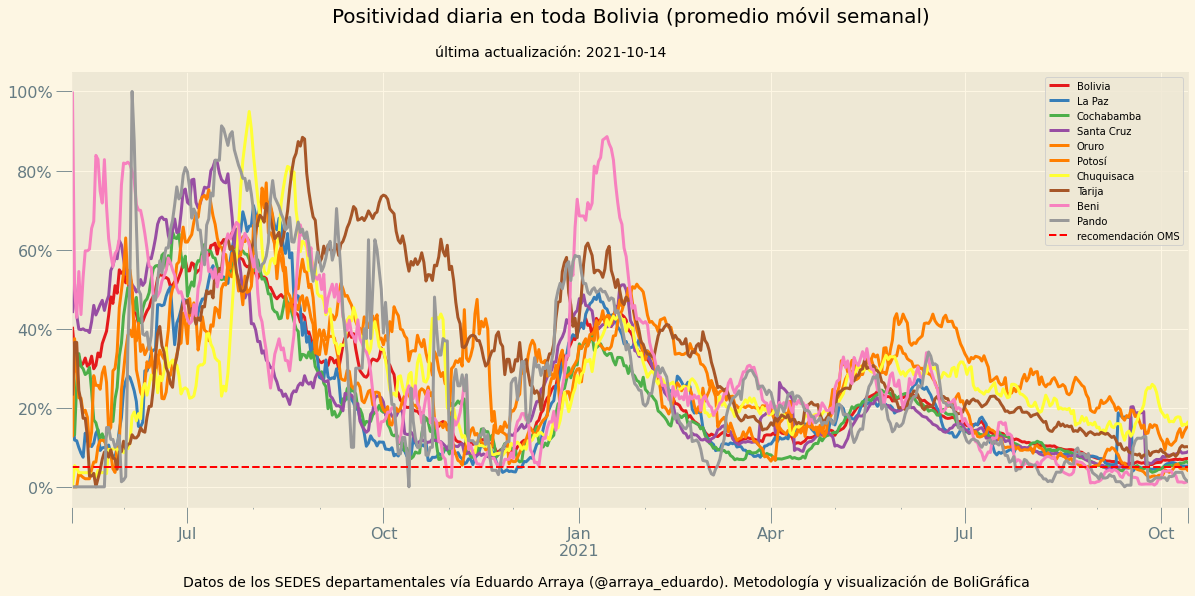

In [29]:
ax = positividad_diaria_adj.plot(figsize = (20,8),zorder=2, linewidth=3, color= cm.get_cmap("Set1",12)(range(1,12)))

plt.grid(zorder=1)
plt.title("Positividad diaria en toda Bolivia (promedio móvil semanal)", fontsize =20, y=1.1)

plt.text(18442,-.25,"Datos de los SEDES departamentales vía Eduardo Arraya (@arraya_eduardo). Metodología y visualización de BoliGráfica", fontsize=14)
plt.text(18560, 1.09,"última actualización: {}".format(pruebas_diarias.index[-1].date()), fontsize=14)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=0))
ax.tick_params(size=16)
ax.axhline(y = .05, color="r", linestyle="dashed", label= "recomendación OMS")
ax.legend()
plt.savefig(directory + "graficas/positividad_diaria_todos.jpg", bbox_inches="tight", dpi=120)

In [30]:
axs = positividad_diaria_adj.interpolate().plot(subplots=True, layout=(5,2), sharey=False, sharex=False, figsize = (15,30), linewidth = 3, 
                                                color=cm.get_cmap("Dark2",6)(range(6)))

axs[0][0].get_figure().suptitle('COVID-19: Positividad diaria en Bolivia y los 9 Departamentos\n(desde el inicio de la pandemia)', y=.93, fontsize = 22)
axs = axs.flatten()

for i in range(10):
  axs[i].set_title(positividad_diaria_adj.columns[i], fontsize = 24)
  axs[i].set_ylim(0,1)
  axs[i].set_yticks((0,0.05,.2,.4,.6,.8,1))
  axs[i].axhline(y=0.05, color='r', linestyle='dotted',label="Recomendación OMS", linewidth=3.5)
  axs[i].legend(fontsize = 14)
  axs[i].yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=0))
  axs[i].text(18720,.7, "Positividad última:\n{}%".format((positividad_diaria_adj.iloc[-1,i]*100).round(1)), ha="center",
              bbox={
              'edgecolor': "black",
              'facecolor': 'w', 
              'alpha': .5}
          )


plt.text(17800, -.2,"Datos de Eduardo Arraya @arraya_eduardo vía los SEDES departamentales, metodología y visualización de BoliGráfica", fontsize=14)
plt.text(18220, 5.92,"(última actualización: {})".format(pruebas_diarias.index[-1].date()), fontsize=12)
plt.savefig(directory + "graficas/positividad_diaria_subplots.jpg", bbox_inches="tight", dpi=120)

/opt/hostedtoolcache/Python/3.9.7/x64/lib/python3.9/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/opt/hostedtoolcache/Python/3.9.7/x64/lib/python3.9/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


In [31]:
# axs = positividad_diaria_adj.interpolate().plot(subplots=True, layout=(2,5), sharey=False, figsize = (20,8))

# axs[0][0].get_figure().suptitle('Positividad diaria en Bolivia desde enero 2021, media móvil de 7 días', y=.96, fontsize = 24)
# axs = axs.flatten()

# for i in range(10):
#   axs[i].grid()
#   axs[i].set_ylim(0,1)
#   axs[i].set_yticks((0,0.05,.2,.4,.6,.8,1))
#   axs[i].axhline(y=0.05, color='r', linestyle='dotted',label="Recomendación OMS")
#   axs[i].legend()
#   axs[i].set_xlim("2021-01-01", positividad_diaria_adj.index[-1])


# plt.savefig(directory + "positividad_2021.jpg")

# MIX

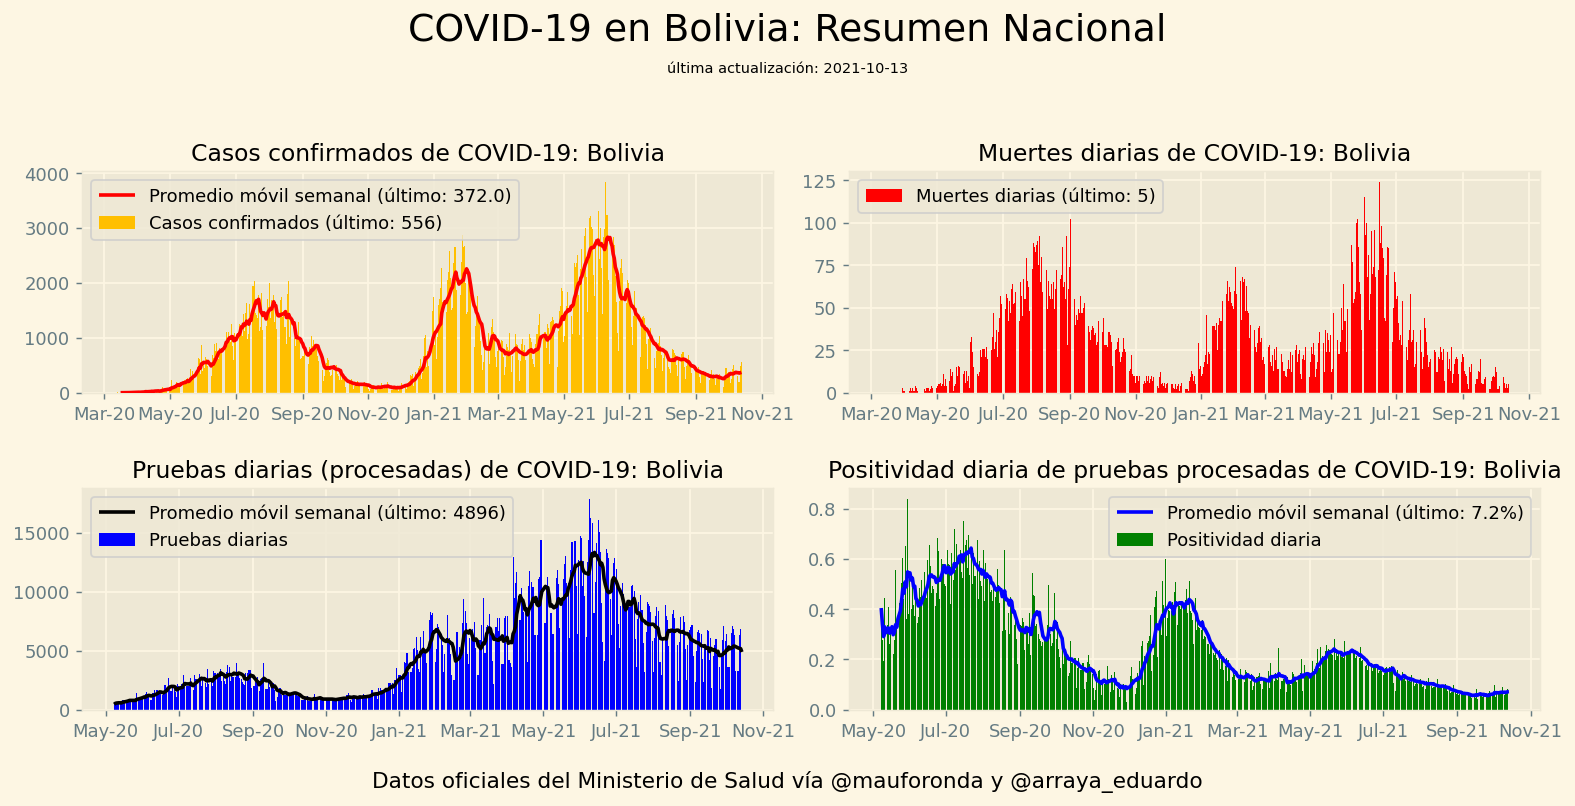

In [32]:
fig, axs = plt.subplots(2,2, figsize = (12,5), dpi=130)
axs = axs.flatten()
fig.tight_layout(pad=0.3, w_pad=0.5, h_pad=2)

# background_color = "#d0d0d0"
# background_color2 = "w"

# fig.set_facecolor(background_color)

fig.suptitle("COVID-19 en Bolivia: Resumen Nacional", fontsize= 21, y=1.128)
fig.text(0.5,-.065,"Datos oficiales del Ministerio de Salud vía @mauforonda y @arraya_eduardo", fontsize=12, ha="center")
fig.text(.5, 1.035,"última actualización: {}".format(muertes_diarias.index[-1].date()), fontsize=8, ha="center")

axs[0].grid(zorder=3)
axs[0].set_title("Casos confirmados de COVID-19: Bolivia", fontsize=13) 
axs[0].bar(casos_diarios.index, casos_diarios.Bolivia, color = "#ffbf00", label="Casos confirmados (último: {})".format(casos_diarios.Bolivia.iloc[-1].astype(int)),width=.8,zorder=2)
axs[0].plot(casos_diarios.index, casos_diarios7.Bolivia, color = "r", label="Promedio móvil semanal (último: {})".format(casos_diarios7.Bolivia.iloc[-1]), zorder=3)
# axs[0].set_facecolor(background_color2)
#axs[0].set_ylim(0,casos_diarios7[casos_diarios7.columns[i]].max()*1.15)
axs[0].legend()
axs[0].xaxis.set_major_formatter(mdates.DateFormatter("%b-%y"))

axs[1].grid(zorder=3)
axs[1].set_title("Muertes diarias de COVID-19: Bolivia", fontsize=13) 
axs[1].bar(muertes_diarias.index, muertes_diarias.Bolivia, color = "r", label="Muertes diarias (último: {})".format(muertes_diarias.Bolivia.iloc[-1]),width=.8,zorder=2)
# axs[1].plot(muertes_diarias.index, muertes_diarias7.Bolivia, color = "g", label="Promedio móvil semanal (último: {})".format(muertes_diarias7.Bolivia.iloc[-1]), zorder=3)
# axs[1].set_facecolor(background_color2)
#axs[1].set_ylim(0,muertes_diarias7[muertes_diarias7.columns[i]].max()*1.15)
axs[1].legend()
axs[1].xaxis.set_major_formatter(mdates.DateFormatter("%b-%y"))


axs[2].grid(zorder=3)
axs[2].set_title("Pruebas diarias (procesadas) de COVID-19: Bolivia", fontsize=13) 
axs[2].bar(pruebas_diarias.index, pruebas_diarias.Bolivia, color = "b", label="Pruebas diarias", width=.8,zorder=2)
axs[2].plot(pruebas_diarias.index, pruebas_diarias7.Bolivia, color = "black", label="Promedio móvil semanal (último: {})".format(pruebas_diarias7.Bolivia.iloc[-1].astype(int)), zorder=3)
# axs[2].set_facecolor(background_color2)
#axs[2].set_ylim(0,pruebas_diarias7[pruebas_diarias7.columns[i]].max()*1.15)
axs[2].legend()
axs[2].xaxis.set_major_formatter(mdates.DateFormatter("%b-%y"))


axs[3].grid(zorder=3)
axs[3].set_title("Positividad diaria de pruebas procesadas de COVID-19: Bolivia", fontsize=13) 
axs[3].bar(positividad_diaria_raw.index, positividad_diaria_raw.Bolivia, color = "g", label="Positividad diaria",width=.8,zorder=2)
axs[3].plot(positividad_diaria_raw.index, positividad_diaria_adj.Bolivia, color = "b", label="Promedio móvil semanal (último: {}%)".format((positividad_diaria_adj.Bolivia.iloc[-1]*100).round(1)), zorder=3)
# axs[3].set_facecolor(background_color2)
#axs[3].set_ylim(0,positividad_diaria_adj[positividad_diaria_adj.olumns[i]].max()*1.15)
axs[3].legend()
axs[3].xaxis.set_major_formatter(mdates.DateFormatter("%b-%y"))

fig.tight_layout(pad=0.3, w_pad=0.5, h_pad=2)


fig.savefig(directory + "graficas/resumen_nacional.jpg", bbox_inches="tight")

# ACTIVOS


In [33]:
activos = casos_diarios.rolling(14).sum()      #-muertes_diarias.rolling(14).sum()
activos.index = pd.to_datetime(activos.index)

activos.to_csv(directory + "activos.csv")
activos

Bolivia  La Paz  Cochabamba  Santa Cruz  Oruro  Potosí  \
2020-03-10      NaN     NaN         NaN         NaN    NaN     NaN   
2020-03-11      NaN     NaN         NaN         NaN    NaN     NaN   
2020-03-12      NaN     NaN         NaN         NaN    NaN     NaN   
2020-03-13      NaN     NaN         NaN         NaN    NaN     NaN   
2020-03-14      NaN     NaN         NaN         NaN    NaN     NaN   
...             ...     ...         ...         ...    ...     ...   
2021-10-09   4945.0   873.0       761.0      2185.0  152.0   137.0   
2021-10-10   5027.0   899.0       767.0      2240.0  157.0   133.0   
2021-10-11   4919.0   891.0       778.0      2150.0  154.0   139.0   
2021-10-12   4953.0   919.0       802.0      2153.0  145.0   132.0   
2021-10-13   5067.0   926.0       832.0      2207.0  148.0   129.0   

            Chuquisaca  Tarija  Beni  Pando  
2020-03-10         NaN     NaN   NaN    NaN  
2020-03-11         NaN     NaN   NaN    NaN  
2020-03-12         NaN     NaN   NaN    NaN  
2020-03-13         NaN     NaN   NaN    NaN  
2020-03-14         NaN     NaN   NaN    NaN  
...                ...     ...   ...    ...  
2021-10-09       422.0   341.0  58.0   16.0  
2021-10-10       416.0   341.0  58.0   16.0  
2021-10-11       427.0   309.0  57.0   14.0  
2021-10-12       429.0   302.0  57.0   14.0  
2021-10-13       467.0   294.0  52.0   12.0  

[583 rows x 10 columns]

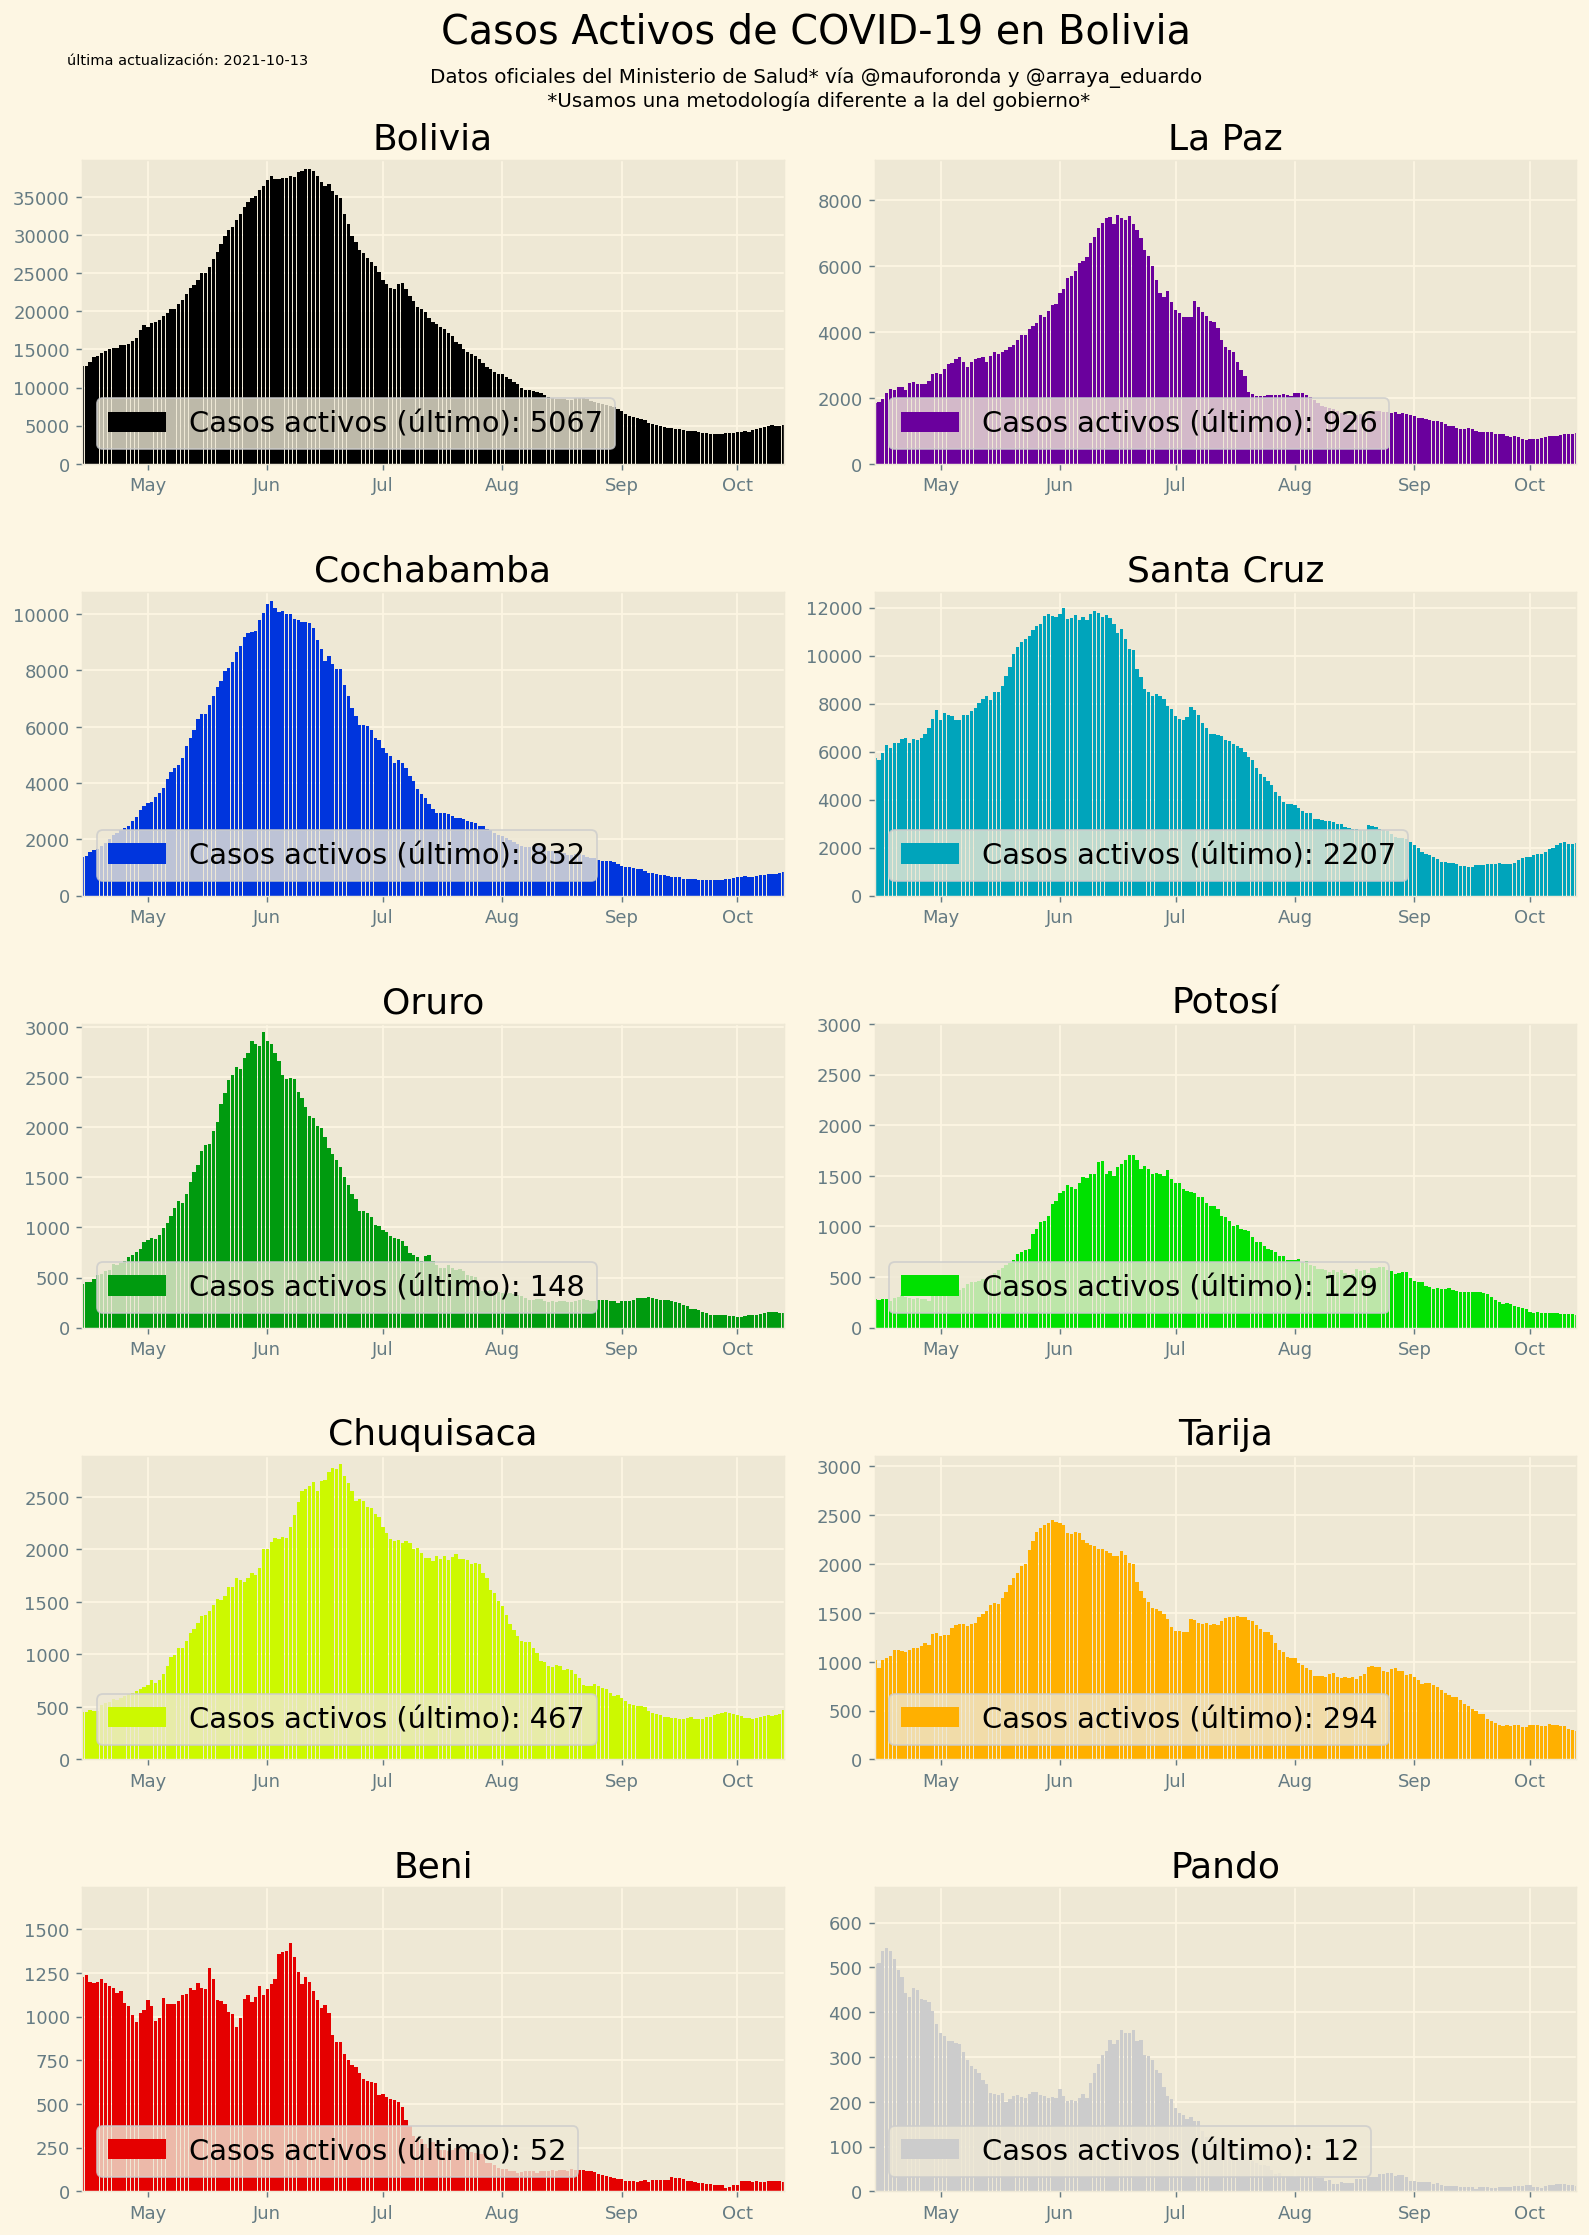

In [34]:
fig, axs = plt.subplots(5,2, figsize = (12,16), dpi=130)
axs = axs.flatten()
fig.tight_layout(pad=0.3, w_pad=2, h_pad=5)

# background_color = "#d0d0d0"
# background_color2 = "w"

# fig.set_facecolor(background_color)

fig.suptitle("Casos Activos de COVID-19 en Bolivia", fontsize= 22, y=1.065)
fig.text(0.5,1.02,"Datos oficiales del Ministerio de Salud* vía @mauforonda y @arraya_eduardo\n *Usamos una metodología diferente a la del gobierno*", fontsize=11, ha="center")
fig.text(.02, 1.04,"última actualización: {}".format(muertes_diarias.index[-1].date()), fontsize=8)

for i in range(10):
   axs[i].grid(zorder=3)
   axs[i].set_title(activos.columns[i], fontsize=20) 
   axs[i].bar(activos.index, activos[activos[400:-1].columns[i]], label="Casos activos (último): {}".format(activos.iloc[-1,i].astype(int)),
              width=.85, zorder=2, 
              color = cm.get_cmap("nipy_spectral",10)(range(10))[i])
   # axs[i].set_facecolor(background_color2)
   axs[i].legend(fontsize=16, loc="lower left")
   axs[i].xaxis.set_major_formatter(mdates.DateFormatter("%b"))
   axs[i].set_xlim(activos.index[400], activos.index[-1])
   axs[i].set_ylim(0, activos[activos[295:-1].columns[i]].max() * 1.03)

fig.savefig(directory + "graficas/activos.jpg", bbox_inches="tight")

In [35]:
activos_ultimo = activos[-1:]
activos_ultimo.T


2021-10-13
Bolivia         5067.0
La Paz           926.0
Cochabamba       832.0
Santa Cruz      2207.0
Oruro            148.0
Potosí           129.0
Chuquisaca       467.0
Tarija           294.0
Beni              52.0
Pando             12.0

In [36]:
activos_ultimo.index = ["Activos por cada 10,000 habitantes"]
habitantes.index = ["Activos por cada 10,000 habitantes"]
activos_ultimo_pc = activos_ultimo / habitantes * 10000
activos_ultimo_pc.T


Activos por cada 10,000 habitantes
Bolivia                               4.360585
La Paz                                3.163649
Cochabamba                            4.100542
Santa Cruz                            6.548961
Oruro                                 2.750929
Potosí                                1.430155
Chuquisaca                            7.331240
Tarija                                5.042882
Beni                                  1.083333
Pando                                 0.779221

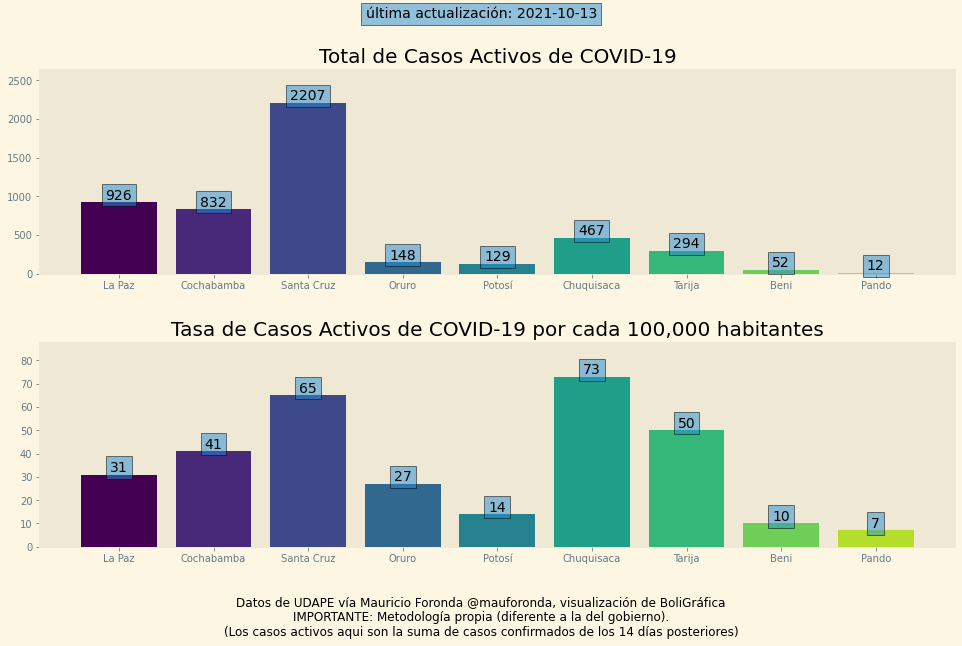

In [37]:
fig, axs = plt.subplots(2,1, figsize=(14,8))

fig.text(.5, 1,"última actualización: {}".format(muertes_diarias.index[-1].date()), fontsize=14, ha="center", bbox={"alpha":0.5})
fig.text(0.5,-.073,"Datos de UDAPE vía Mauricio Foronda @mauforonda, visualización de BoliGráfica\nIMPORTANTE: Metodología propia (diferente a la del gobierno).\n(Los casos activos aqui son la suma de casos confirmados de los 14 días posteriores)", 
         fontsize=12, ha="center")

bar1 = axs[0].bar(activos_ultimo.T.index[1:10], 
           activos_ultimo.T[1:10][activos_ultimo.T.columns[0]],
           color = cm.get_cmap("viridis",10)(range(10)))
axs[0].set_title("Total de Casos Activos de COVID-19", fontsize = 20)
axs[0].set_ylim(0,activos_ultimo.T[1:10][activos_ultimo.T.columns[0]].max()*1.2)
axs[0].bar_label(bar1, fontsize=14,
                 bbox={
                     "alpha":0.5
                 })
axs[0].grid(axis="both")


bar2 = axs[1].bar(activos_ultimo_pc.T.index[1:10], 
           (activos_ultimo_pc.T[1:10]["Activos por cada 10,000 habitantes"]*10).astype(int),
           color = cm.get_cmap("viridis",10)(range(10)))
axs[1].set_title("Tasa de Casos Activos de COVID-19 por cada 100,000 habitantes", fontsize = 20)
axs[1].bar_label(bar2, fontsize=14,
                 bbox={
                     "alpha":0.5
                 })
axs[1].grid(axis="both")
axs[1].set_ylim(0,activos_ultimo_pc.T[1:10][activos_ultimo_pc.T.columns[0]].max()*12)





fig.tight_layout(pad=3)

fig.savefig(directory + "graficas/activos_pc.jpg", bbox_inches = "tight")

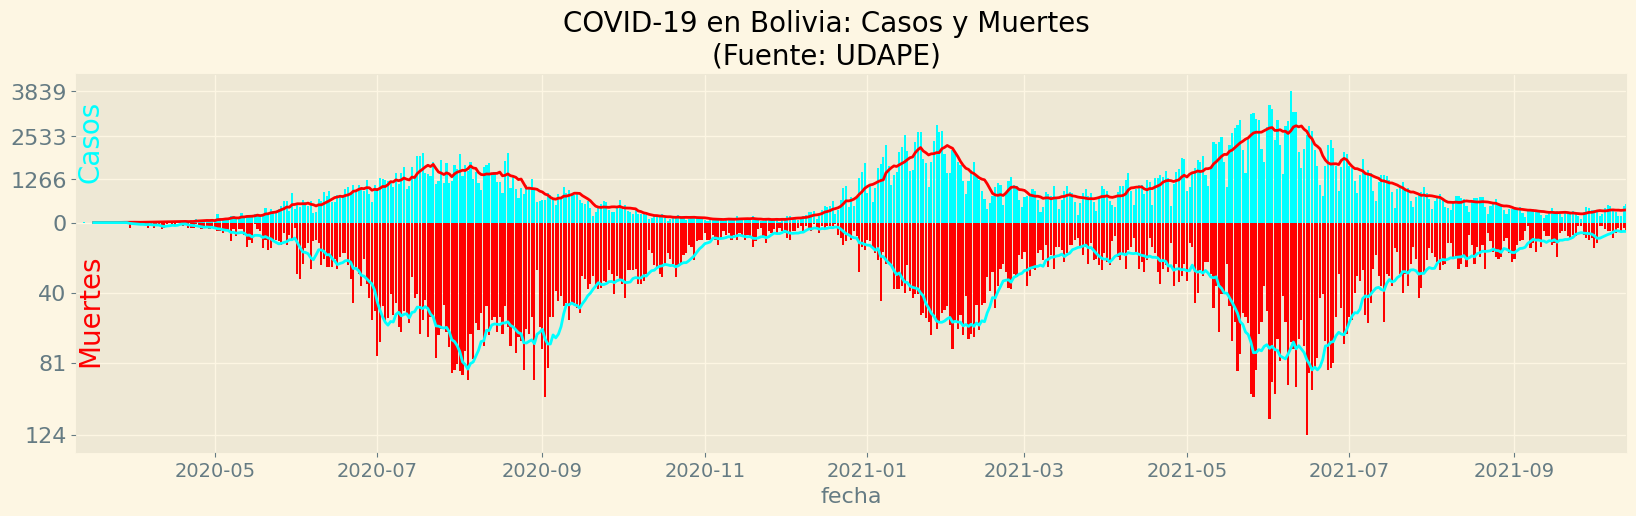

In [38]:

def plotter(region, start=0, end = -1, multiplier  = -50, bar_label=False):
    
    casos = casos_diarios.loc[:,region]
    muertes = muertes_diarias.loc[:,region]

    fig, axs = plt.subplots(1,1,figsize=(20,5), dpi=100)
    fig.suptitle("COVID-19 en {}: Casos y Muertes\n(Fuente: UDAPE)".format(region), fontsize=20, y =1.01)


    barc = axs.bar(casos.index, casos, color="cyan")   
    barm = axs.bar(muertes.index, muertes * multiplier, color="r")
    axs.plot(casos.index, casos.rolling(7).mean(), color="r")
    axs.plot(muertes.index, muertes.rolling(7).mean() * multiplier , color="cyan")
    
    axs.set_xlim(xmin=casos.index[start], xmax=casos.index[-1])
    # axs.set_ylim(muertes[start:].max()*-1.1, casos[start:].max()*1.2)
    axs.set_xlabel("fecha", fontsize=16)
    axs.set_yticks([casos.max()*1,
                    casos.max()*.66,
                    casos.max()*.33,
                    0,
                    muertes.max()*.33 * multiplier,
                    muertes.max()*.66 * multiplier,
                    muertes.max()* 1 * multiplier
                   ])
    axs.set_yticklabels([
                    int(casos.max()*1),
                    int(casos.max()*.66),
                    int(casos.max()*.33),
                    (0),
                    int(muertes.max()*.33),
                    int(muertes.max()*.66),
                    int(muertes.max()* 1)
                   ],
        fontsize=16
        )
    plt.xticks(fontsize=14)
    
    if bar_label==True:
        axs.bar_label(barc)
        axs.bar_label(barm)
    
    

    axs.annotate("Casos",
                xy=(casos.index[start], casos.max()*.35),
                fontsize=20,
                color="cyan",
                rotation=90)
    axs.annotate("Muertes",
                xy=(muertes.index[start], muertes.max()*.65*multiplier),
                fontsize=20,
                color="r",
                rotation=90)

###############################################################################################
###############################################################################################
###############################################################################################


   
# for i in casos_diarios.columns:
#     plotter(i)
    
plotter("Bolivia")


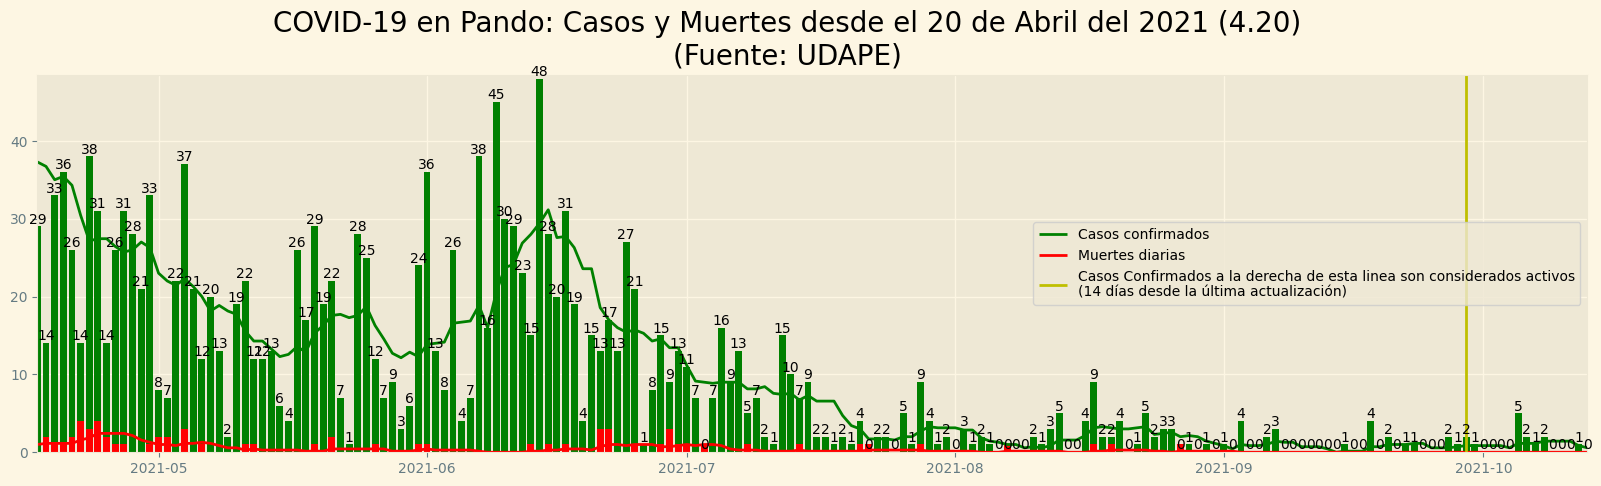

In [39]:
def plotter1(region, start=0, extra=0):

    casos = casos_diarios.loc[:,region]
    muertes = muertes_diarias.loc[:,region]
    
    fig, axs = plt.subplots(1,1,figsize=(20,5), dpi=100)
    fig.suptitle("COVID-19 en {}: Casos y Muertes desde el 20 de Abril del 2021 (4.20)\n(Fuente: UDAPE)".format(region), fontsize=20, y =1.01)


    barc = axs.bar(casos.index, casos, color="g")   
    barm = axs.bar(muertes.index, muertes, color="r")
    axs.plot(casos.index, casos.rolling(7).mean(), color="g", label="Casos confirmados")
    axs.plot(muertes.index, muertes.rolling(7).mean(), color="r", label="Muertes diarias")
    axs.axvline(muertes.index[-15], color="y", label="Casos Confirmados a la derecha de esta linea son considerados activos\n(14 días desde la última actualización)")
    axs.bar_label(barc)
    axs.set_xlim(xmin=casos.index[start], xmax=casos.index[-1])
    axs.set_ylim(0, casos[start:].max()*1.01) 
    axs.legend(loc="center right")
    
plotter1("Pando", start=403)
# plotter1("Beni", start=403)

In [40]:
casos_diarios.tail(30)

Bolivia  La Paz  Cochabamba  Santa Cruz  Oruro  Potosí  \
2021-09-14      340      75          30         109     16      26   
2021-09-15      420     132          57          96     18      29   
2021-09-16      322      74          56         106     11      18   
2021-09-17      346      66          40         142     13      30   
2021-09-18      250      73          18          73     15      20   
2021-09-19      150      50          18          35      7       2   
2021-09-20      286      17          65         154      1       5   
2021-09-21      290      48          39         104      8      17   
2021-09-22      308      63          54         119     10       8   
2021-09-23      347      72          54         135      5      12   
2021-09-24      264      75          57          52      3       9   
2021-09-25      195      46           9          58      5      21   
2021-09-26      105      24           6          31      8       7   
2021-09-27      307      17          42         159      3       7   
2021-09-28      446      53          64         224     15      20   
2021-09-29      442      66          85         194      7      19   
2021-09-30      355      65          77         134     15       2   
2021-10-01      378      75          64         158      8       7   
2021-10-02      356      87          46         151     12      11   
2021-10-03      183      54          20          60     20       5   
2021-10-04      254      25          31         157      2       4   
2021-10-05      431      77          66         197      9      10   
2021-10-06      503      96          77         229     11      12   
2021-10-07      472      89         100         184     16       9   
2021-10-08      410      78          51         185     17       9   
2021-10-09      303      67          32         122      9      15   
2021-10-10      187      50          12          86     13       3   
2021-10-11      199       9          53          69      0      13   
2021-10-12      480      81          88         227      6      13   
2021-10-13      556      73         115         248     10      16   

            Chuquisaca  Tarija  Beni  Pando  
2021-09-14          25      38    21      0  
2021-09-15          36      49     2      1  
2021-09-16          37      19     1      0  
2021-09-17          26      28     1      0  
2021-09-18          34      13     0      4  
2021-09-19          35       3     0      0  
2021-09-20          20      22     0      2  
2021-09-21          35      35     4      0  
2021-09-22          30      19     4      1  
2021-09-23          36      30     2      1  
2021-09-24          42      24     2      0  
2021-09-25          33      23     0      0  
2021-09-26          26       3     0      0  
2021-09-27          25      51     1      2  
2021-09-28          34      35     0      1  
2021-09-29          30      31     8      2  
2021-09-30          25      20    16      1  
2021-10-01          20      45     1      0  
2021-10-02          22       8    19      0  
2021-10-03          21       3     0      0  
2021-10-04          17      18     0      0  
2021-10-05          28      37     2      5  
2021-10-06          38      31     7      2  
2021-10-07          45      28     0      1  
2021-10-08          46      20     2      2  
2021-10-09          45      11     2      0  
2021-10-10          20       3     0      0  
2021-10-11          36      19     0      0  
2021-10-12          36      28     0      1  
2021-10-13          68      23     3      0